# CALIFORNIA HOUSE PRICE DATA

In [41]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn import svm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.cross_decomposition import PLSRegression
from sklearn import tree
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble._forest import RandomForestRegressor
import matplotlib.pyplot as plt

In [42]:
cal_housing = fetch_california_housing()
X, y = cal_housing.data, cal_housing.target
names = cal_housing.feature_names
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3,
random_state = 0)

# Linear regression model


In [65]:
from sklearn.linear_model import LinearRegression
lm  = LinearRegression()
model = lm.fit(Xtrain, ytrain)
y_pred=model.predict(Xtest)
mse = mean_squared_error(ytest, model.predict(Xtest))

In [66]:
# The mean absolute error
print("MAE = %5.3f" % mean_absolute_error(ytest, y_pred))
# Explained variance score: 1 is perfect prediction
print("R^2 = %0.5f" % r2_score(ytest, y_pred))
# The mean squared error
print("MSE = %5.3f" % mean_squared_error(ytest, y_pred))

MAE = 0.536
R^2 = 0.59261
MSE = 0.543


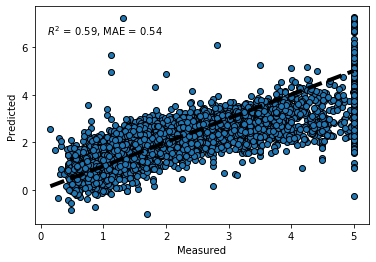

In [67]:
fig, ax = plt.subplots()
ax.scatter(ytest, y_pred, edgecolors = (0, 0, 0))
ax.text(0.1,6.5, r"$R^2$ = %.2f, MAE = %.2f" % (
r2_score(ytest, y_pred), mean_absolute_error(ytest, y_pred)))
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], "k--",
lw = 4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

# Ridge regression

In [47]:
from sklearn.linear_model import Ridge
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
model=reg.fit(Xtrain, ytrain)
Ridge(alpha=0.5)
y_pred=model.predict(Xtest)

In [48]:
# The mean absolute error
print("MAE = %5.3f" % mean_absolute_error(ytest, y_pred))
# Explained variance score: 1 is perfect prediction
print("R^2 = %0.5f" % r2_score(ytest, y_pred))
# The mean squared error
print("MSE = %5.3f" % mean_squared_error(ytest, y_pred))

MAE = 0.536
R^2 = 0.59261
MSE = 0.543


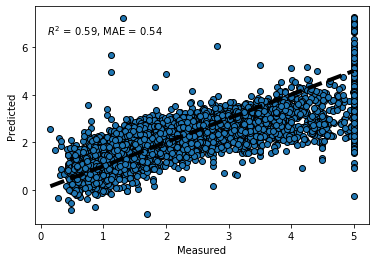

In [49]:
fig, ax = plt.subplots()
ax.scatter(ytest, y_pred, edgecolors = (0, 0, 0))
ax.text(0.1,6.5, r"$R^2$ = %.2f, MAE = %.2f" % (
r2_score(ytest, y_pred), mean_absolute_error(ytest, y_pred)))
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], "k--",
lw = 4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

# Kernel Ridge model

In [50]:
from sklearn.kernel_ridge import KernelRidge
clf = KernelRidge(alpha=1.0)
model=clf.fit(Xtrain, ytrain)
y_pred=model.predict(Xtest)

In [51]:
# The mean absolute error
print("MAE = %5.3f" % mean_absolute_error(ytest, y_pred))
# Explained variance score: 1 is perfect prediction
print("R^2 = %0.5f" % r2_score(ytest, y_pred))
# The mean squared error
print("MSE = %5.3f" % mean_squared_error(ytest, y_pred))

MAE = 0.579
R^2 = 0.51995
MSE = 0.640


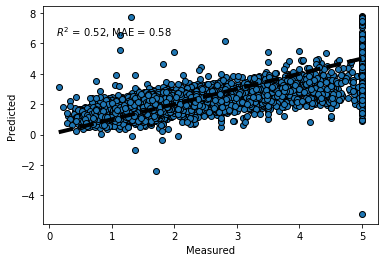

In [52]:
fig, ax = plt.subplots()
ax.scatter(ytest, y_pred, edgecolors = (0, 0, 0))
ax.text(0.1,6.5, r"$R^2$ = %.2f, MAE = %.2f" % (
r2_score(ytest, y_pred), mean_absolute_error(ytest, y_pred)))
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], "k--",
lw = 4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

# SVR (Support vector regression)

In [53]:
from sklearn import svm
C=10

""" The parameters and kernels of SVM classifierr can be changed as follows
C = 10.0  # SVM regularization parameter
svm.SVC(kernel='linear', C=C)
svm.LinearSVC(C=C, max_iter=10000)
svm.SVC(kernel='rbf', gamma=0.7, C=C)
svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
"""

regr = svm.SVR()
model=regr.fit(Xtrain, ytrain)
y_pred=model.predict(Xtest)

In [54]:
# The mean absolute error
print("MAE = %5.3f" % mean_absolute_error(ytest, y_pred))
# Explained variance score: 1 is perfect prediction
print("R^2 = %0.5f" % r2_score(ytest, y_pred))
# The mean squared error
print("MSE = %5.3f" % mean_squared_error(ytest, y_pred))

MAE = 0.874
R^2 = -0.02661
MSE = 1.369


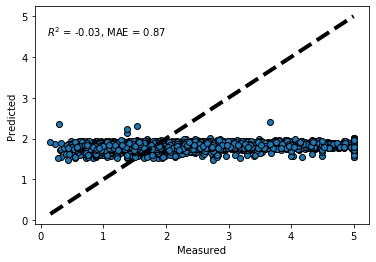

In [55]:
fig, ax = plt.subplots()
ax.scatter(ytest, y_pred, edgecolors = (0, 0, 0))
ax.text(0.1,4.5, r"$R^2$ = %.2f, MAE = %.2f" % (
r2_score(ytest, y_pred), mean_absolute_error(ytest, y_pred)))
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], "k--",
lw = 4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

# GaussianProcessRegressor

In [74]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
model= GaussianProcessRegressor(kernel=kernel,
        random_state=0).fit(Xtrain, ytrain)
y_pred=model.predict(Xtest)

In [75]:
# The mean absolute error
print("MAE = %5.3f" % mean_absolute_error(ytest, y_pred))
# Explained variance score: 1 is perfect prediction
print("R^2 = %0.5f" % r2_score(ytest, y_pred))
# The mean squared error
print("MSE = %5.3f" % mean_squared_error(ytest, y_pred))

MAE = 0.548
R^2 = 0.56790
MSE = 0.576


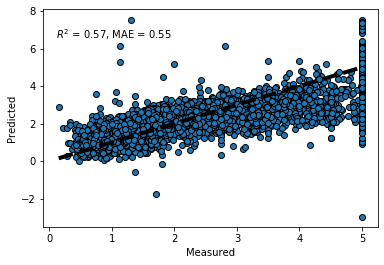

In [76]:
fig, ax = plt.subplots()
ax.scatter(ytest, y_pred, edgecolors = (0, 0, 0))
ax.text(0.1,6.5, r"$R^2$ = %.2f, MAE = %.2f" % (
r2_score(ytest, y_pred), mean_absolute_error(ytest, y_pred)))
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], "k--",
lw = 4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

# PLSRegression

In [36]:
from sklearn.cross_decomposition import PLSRegression
pls2 = PLSRegression(n_components=2)
model=pls2.fit(Xtrain, ytrain)
#PLSRegression()
y_pred=model.predict(Xtest)

In [37]:
# The mean absolute error
print("MAE = %5.3f" % mean_absolute_error(ytest, y_pred))
# Explained variance score: 1 is perfect prediction
print("R^2 = %0.5f" % r2_score(ytest, y_pred))
# The mean squared error
print("MSE = %5.3f" % mean_squared_error(ytest, y_pred))

MAE = 0.595
R^2 = 0.50580
MSE = 0.659


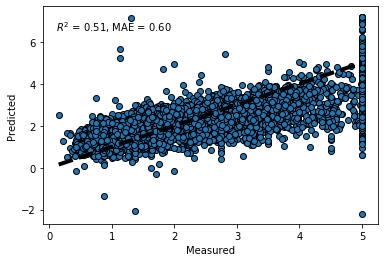

In [39]:
fig, ax = plt.subplots()
ax.scatter(ytest, y_pred, edgecolors = (0, 0, 0))
ax.text(0.1,6.5, r"$R^2$ = %.2f, MAE = %.2f" % (
r2_score(ytest, y_pred), mean_absolute_error(ytest, y_pred)))
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], "k--",
lw = 4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

# DecisionTree Regression

In [56]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
model = clf.fit(Xtrain, ytrain)
y_pred=model.predict(Xtest)

In [57]:
# The mean absolute error
print("MAE = %5.3f" % mean_absolute_error(ytest, y_pred))
# Explained variance score: 1 is perfect prediction
print("R^2 = %0.5f" % r2_score(ytest, y_pred))
# The mean squared error
print("MSE = %5.3f" % mean_squared_error(ytest, y_pred))

MAE = 0.469
R^2 = 0.59157
MSE = 0.545


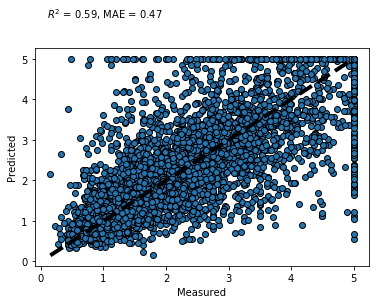

In [58]:
fig, ax = plt.subplots()
ax.scatter(ytest, y_pred, edgecolors = (0, 0, 0))
ax.text(0.1,6.0, r"$R^2$ = %.2f, MAE = %.2f" % (
r2_score(ytest, y_pred), mean_absolute_error(ytest, y_pred)))
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], "k--",
lw = 4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

# AdaBoost Regression

In [31]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
model=regr.fit(Xtrain, ytrain)
y_pred=model.predict(Xtest)

In [32]:
# The mean absolute error
print("MAE = %5.3f" % mean_absolute_error(ytest, y_pred))
# Explained variance score: 1 is perfect prediction
print("R^2 = %0.5f" % r2_score(ytest, y_pred))
# The mean squared error
print("MSE = %5.3f" % mean_squared_error(ytest, y_pred))

MAE = 0.758
R^2 = 0.41991
MSE = 0.773


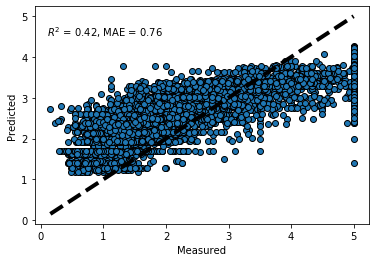

In [34]:
fig, ax = plt.subplots()
ax.scatter(ytest, y_pred, edgecolors = (0, 0, 0))
ax.text(0.1,4.5, r"$R^2$ = %.2f, MAE = %.2f" % (
r2_score(ytest, y_pred), mean_absolute_error(ytest, y_pred)))
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], "k--",
lw = 4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

# MLP (multi-layer perceptron) Regression 

In [83]:
# Create MLP regression object
print("Training MLPRegressor...")
regr = MLPRegressor(activation = "logistic")
# Train the model using the training sets
regr.fit(Xtrain, ytrain)
# Make predictions using the testing set
ypred = regr.predict(Xtest)

Training MLPRegressor...


In [84]:
# The mean absolute error
print("MAE = %5.3f" % mean_absolute_error(ytest, y_pred))
# Explained variance score: 1 is perfect prediction
print("R^2 = %0.5f" % r2_score(ytest, ypred))
# The mean squared error
print("MSE = %5.3f" % mean_squared_error(ytest, ypred))

MAE = 0.548
R^2 = 0.66548
MSE = 0.446


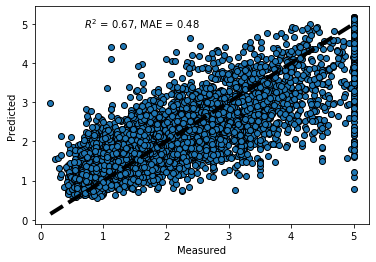

In [85]:
fig, ax = plt.subplots()
ax.scatter(ytest, ypred, edgecolors = (0, 0, 0))
ax.text(ypred.max()-4.5, ytest.max()-0.1, r"$R^2$ = %.2f, MAE = %.2f" % (
r2_score(ytest, ypred), mean_absolute_error(ytest, ypred)))
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], "k--",
lw = 4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

# KNeighbors 

In [86]:
from sklearn.neighbors import KNeighborsRegressor
# Create a Regression object
print("Training Regressor...")
regr = KNeighborsRegressor(n_neighbors = 2)
# Train the model using the training sets
regr.fit(Xtrain, ytrain)
# Make predictions using the testing set
ypred = regr.predict(Xtest)

Training Regressor...


In [87]:
# The mean absolute error
print("MAE = %5.3f" % mean_absolute_error(ytest, ypred))
# Explained variance score: 1 is perfect prediction
print("R^2 = %0.5f" % r2_score(ytest, ypred))
# The mean squared error
print("MSE = %5.3f" % mean_squared_error(ytest, ypred))

MAE = 0.862
R^2 = 0.03783
MSE = 1.283


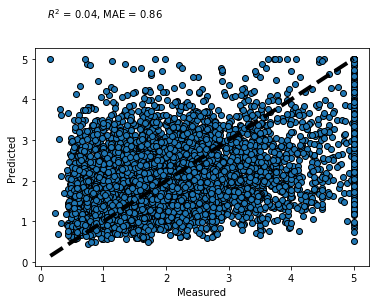

In [88]:
fig, ax = plt.subplots()
ax.scatter(ytest, ypred, edgecolors = (0, 0, 0))
ax.text(0.1,6.0, r"$R^2$ = %.2f, MAE = %.2f" % (
r2_score(ytest, ypred), mean_absolute_error(ytest, ypred)))
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], "k--",
lw = 4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

# Random Forest Regression

In [89]:
from sklearn.ensemble._forest import RandomForestRegressor
# Create Random Forest Regressor Model
regr = RandomForestRegressor(n_estimators = 100)
# Train the model using the training sets
regr.fit(Xtrain, ytrain)
# Make predictions using the testing set
ypred = regr.predict(Xtest)

In [90]:
# The mean absolute error
print("MAE = %5.3f" % mean_absolute_error(ytest, ypred))
# Explained variance score: 1 is perfect prediction
print("R^2 = %0.5f" % r2_score(ytest, ypred))
# The mean squared error
print("MSE = %5.3f" % mean_squared_error(ytest, ypred))

MAE = 0.339
R^2 = 0.79345
MSE = 0.275


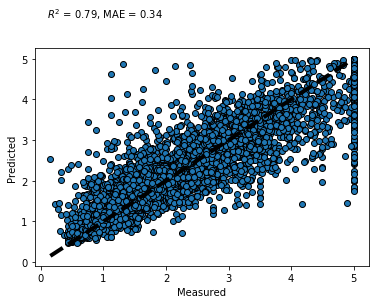

In [91]:
fig, ax = plt.subplots()
ax.scatter(ytest, ypred, edgecolors = (0, 0, 0))
ax.text(0.1,6.0, r"$R^2$ = %.2f, MAE = %.2f" % (
r2_score(ytest, ypred), mean_absolute_error(ytest, ypred)))
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], "k--",
lw = 4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

# XGBoost Regression

In [9]:
from xgboost import XGBRegressor
xgb = XGBRegressor().fit(Xtrain, ytrain)
ypred = xgb.predict(Xtest)


"""xgb_tuned = XGBRegressor(colsample_bytree = 0.7, 
                         learning_rate = 0.5, 
                         max_depth = 2, 
                         n_estimators = 100).fit(X_train, y_train)   """

[00:41:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [10]:
# The mean absolute error
print("MAE = %5.3f" % mean_absolute_error(ytest, ypred))
# Explained variance score: 1 is perfect prediction
print("R^2 = %0.5f" % r2_score(ytest, ypred))
# The mean squared error
print("MSE = %5.3f" % mean_squared_error(ytest, ypred))

MAE = 0.369
R^2 = 0.78291
MSE = 0.289


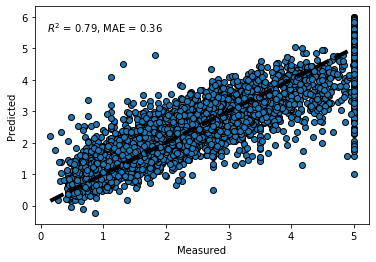

In [20]:
fig, ax = plt.subplots()
ax.scatter(ytest, ypred, edgecolors = (0, 0, 0))
ax.text(0.1,5.5, r"$R^2$ = %.2f, MAE = %.2f" % (
r2_score(ytest, ypred), mean_absolute_error(ytest, ypred)))
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], "k--",
lw = 4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

## XGBoost regression parameters

In [24]:
from xgboost import XGBRegressor
xgb = XGBRegressor(colsample_bytree = 0.7, 
                         learning_rate = 0.5, 
                         max_depth = 2, 
                         n_estimators = 100).fit(Xtrain, ytrain)
ypred = xgb.predict(Xtest)


[01:38:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [25]:
# The mean absolute error
print("MAE = %5.3f" % mean_absolute_error(ytest, ypred))
# Explained variance score: 1 is perfect prediction
print("R^2 = %0.5f" % r2_score(ytest, ypred))
# The mean squared error
print("MSE = %5.3f" % mean_squared_error(ytest, ypred))

MAE = 0.363
R^2 = 0.79024
MSE = 0.280


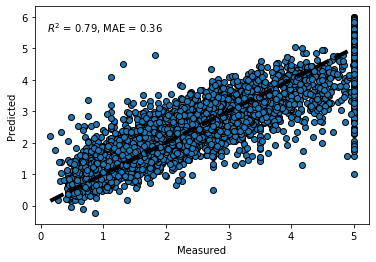

In [26]:
fig, ax = plt.subplots()
ax.scatter(ytest, ypred, edgecolors = (0, 0, 0))
ax.text(0.1,5.5, r"$R^2$ = %.2f, MAE = %.2f" % (
r2_score(ytest, ypred), mean_absolute_error(ytest, ypred)))
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], "k--",
lw = 4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()